##importing Neccesary libraries

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import  RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,mean_absolute_percentage_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor


Loading the dataset

In [2]:
data=pd.read_csv(r'C:\Users\pcd\Desktop\datasets\datasets_to_work_on\power_plant.csv')

#DATA ANALYSIS

In [3]:
data['AP'].value_counts()

1013.88    16
1010.99    15
1013.23    14
1009.61    14
1013.02    14
           ..
1004.57     1
1028.22     1
1021.49     1
1026.30     1
1023.67     1
Name: AP, Length: 2517, dtype: int64

In [4]:
data['RH'].value_counts()

100.09    26
82.80     10
73.67      8
77.00      8
75.09      8
          ..
78.56      1
54.90      1
49.73      1
61.32      1
36.48      1
Name: RH, Length: 4546, dtype: int64

In [5]:
data['AT'].value_counts()

25.21    14
13.78    12
24.43    11
23.56    10
11.02    10
         ..
9.89      1
7.34      1
12.92     1
27.72     1
9.71      1
Name: AT, Length: 2773, dtype: int64

In [6]:
data['V'].value_counts()

41.17    61
70.32    61
51.43    47
45.01    46
68.08    45
         ..
70.09     1
56.24     1
73.11     1
45.78     1
60.06     1
Name: V, Length: 634, dtype: int64

In [7]:
data.corr()

,AT,V,AP,RH,PE
AT,1.000000,0.844107,-0.507549,-0.542535,-0.948128
V,0.844107,1.000000,-0.413502,-0.312187,-0.869780
AP,-0.507549,-0.413502,1.000000,0.099574,0.518429
RH,-0.542535,-0.312187,0.099574,1.000000,0.389794
PE,-0.948128,-0.869780,0.518429,0.389794,1.000000


In [8]:
data.isnull().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.8 KB


In [10]:
data.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [11]:
data.var()

AT     55.539357
V     161.490544
AP     35.269152
RH    213.167848
PE    291.282318
dtype: float64

In [12]:
data.sort_values('AP')

,AT,V,AP,RH,PE
9068,15.62,41.23,992.89,83.99,463.21
8133,18.21,41.23,993.11,62.29,457.53
4067,13.83,41.23,993.31,93.94,466.20
7077,12.95,41.23,993.74,96.35,469.05
5863,18.15,41.23,993.82,61.21,456.32
...,...,...,...,...,...
4125,9.99,41.82,1033.14,68.36,475.75
3015,9.66,41.82,1033.19,73.19,477.67
319,9.25,41.82,1033.25,74.73,478.48
7892,8.76,41.82,1033.29,76.50,480.08


array([[<AxesSubplot:title={'center':'AT'}>,
        <AxesSubplot:title={'center':'V'}>],
       [<AxesSubplot:title={'center':'AP'}>,
        <AxesSubplot:title={'center':'RH'}>],
       [<AxesSubplot:title={'center':'PE'}>, <AxesSubplot:>]],
      dtype=object)

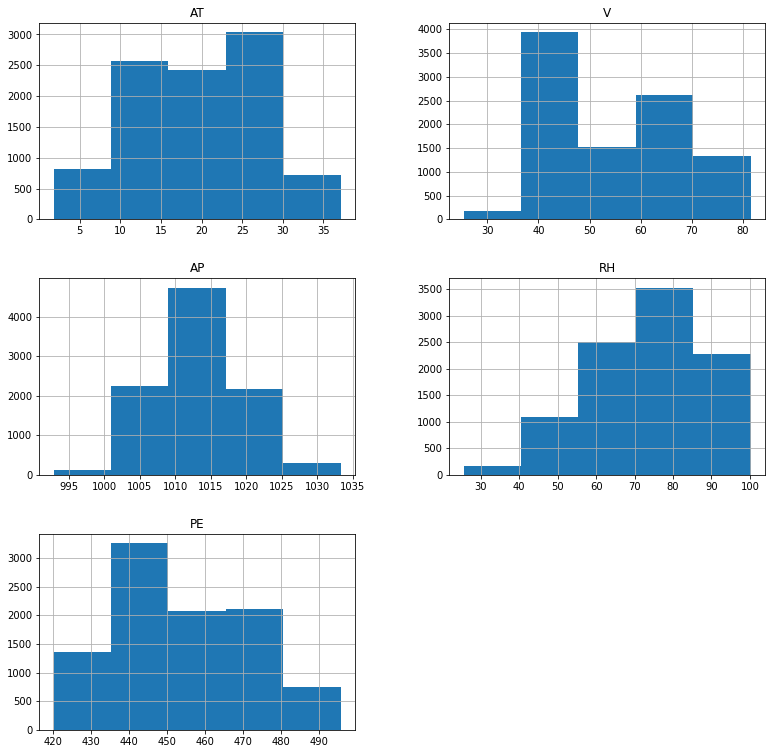

In [13]:
data.hist(bins=5,figsize=(13,13))

<AxesSubplot:xlabel='AT'>

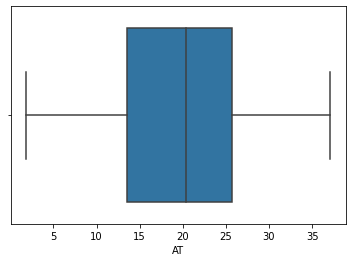

In [14]:
sns.boxplot('AT',data=data)

<AxesSubplot:>

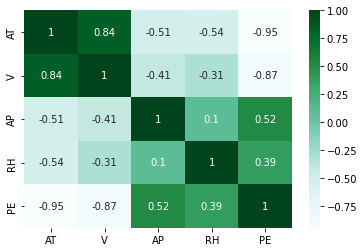

In [15]:
sns.heatmap(data.corr(),annot=True,cmap='BuGn')

<AxesSubplot:xlabel='V'>

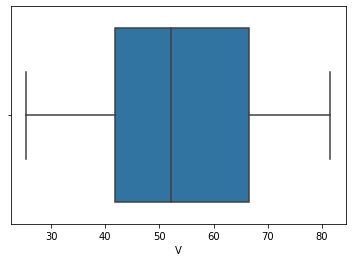

In [16]:
sns.boxplot('V',data=data)

<AxesSubplot:xlabel='AT'>

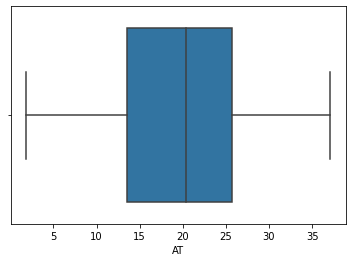

In [17]:

sns.boxplot('AT',data=data)

<AxesSubplot:xlabel='AP'>

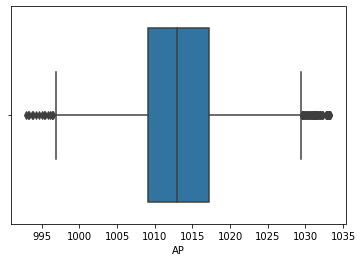

In [18]:
sns.boxplot('AP',data=data)


<AxesSubplot:xlabel='RH'>

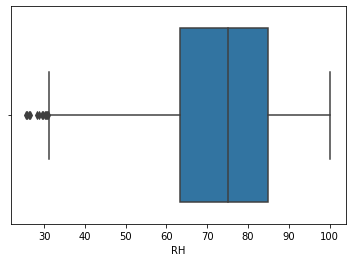

In [19]:
sns.boxplot('RH',data=data)

In [20]:
#finding and removing outliers from atmospheric pressure
ll=data['AP'].quantile(0.05)
ul=data['AP'].quantile(0.95)
data=data[(data['AP']>ll) & (data['AP']<ul)]

In [21]:
#finding and removing outliers from relative humidity 
ll=data['RH'].quantile(0.05)
ul=data['RH'].quantile(0.95)
data=data[(data['RH']>ll) & (data['RH']<ul)]
data

,AT,V,AP,RH,PE
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
5,26.27,59.44,1012.23,58.77,443.67
6,15.89,43.96,1014.02,75.24,467.35
...,...,...,...,...,...
9561,11.76,41.58,1020.91,88.35,465.45
9562,14.02,40.10,1015.56,82.44,467.32
9563,16.65,49.69,1014.01,91.00,460.03
9566,24.48,69.45,1013.86,62.39,435.74


<AxesSubplot:xlabel='RH'>

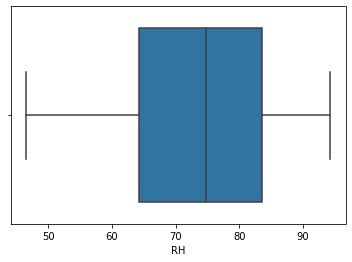

In [22]:
sns.boxplot('RH',data=data)

In [23]:
data

,AT,V,AP,RH,PE
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
5,26.27,59.44,1012.23,58.77,443.67
6,15.89,43.96,1014.02,75.24,467.35
...,...,...,...,...,...
9561,11.76,41.58,1020.91,88.35,465.45
9562,14.02,40.10,1015.56,82.44,467.32
9563,16.65,49.69,1014.01,91.00,460.03
9566,24.48,69.45,1013.86,62.39,435.74


In [24]:
data.describe()

,AT,V,AP,RH,PE
count,7746.000000,7746.000000,7746.000000,7746.000000,7746.000000
mean,19.832253,54.820395,1013.221747,73.459080,453.909096
std,7.113100,12.576789,4.662832,12.153825,16.717369
min,2.640000,25.360000,1004.000000,46.520000,420.260000
25%,13.930000,42.070000,1009.572500,64.205000,440.000000
50%,20.890000,56.530000,1013.005000,74.790000,450.420000
75%,25.537500,66.510000,1016.857500,83.587500,467.460000
max,34.960000,81.560000,1023.440000,94.260000,495.760000


In [25]:
data.corr()

,AT,V,AP,RH,PE
AT,1.000000,0.841589,-0.506259,-0.483119,-0.948447
V,0.841589,1.000000,-0.413279,-0.268587,-0.867445
AP,-0.506259,-0.413279,1.000000,0.081643,0.517951
RH,-0.483119,-0.268587,0.081643,1.000000,0.340834
PE,-0.948447,-0.867445,0.517951,0.340834,1.000000


<AxesSubplot:>

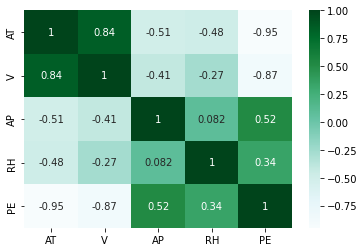

In [26]:
sns.heatmap(data.corr(),annot=True,cmap='BuGn')

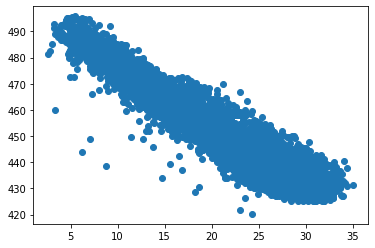

In [27]:
plt.scatter(data['AT'],data['PE'])
plt.show()

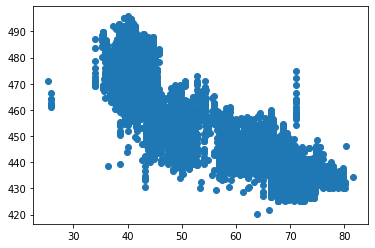

In [28]:
plt.scatter(data['V'],data['PE'])

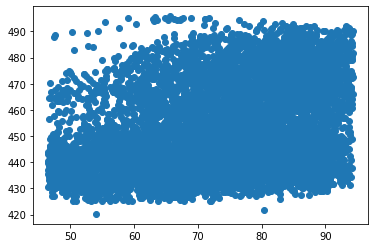

In [29]:
plt.scatter(data['RH'],data['PE'])

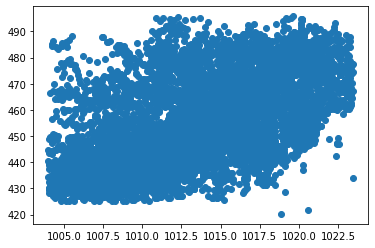

In [30]:
plt.scatter(data['AP'],data['PE'])

In [31]:
#sns.pairplot(data,kind='kde')

In [32]:
#splitting of data into x and y datasets
x=data.iloc[:,[0,1,2,3]].values
x

array([[  25.18,   62.96, 1020.04,   59.08],
       [   5.11,   39.4 , 1012.16,   92.14],
       [  20.86,   57.32, 1010.24,   76.64],
       ...,
       [  16.65,   49.69, 1014.01,   91.  ],
       [  24.48,   69.45, 1013.86,   62.39],
       [  21.6 ,   62.52, 1017.23,   67.87]])

In [33]:
y=data.iloc[:,-1].values
y

array([444.37, 488.56, 446.48, ..., 460.03, 435.74, 453.28])

#splitting the datasets

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.10,random_state=40)
#scaling the datset

In [35]:
#applying multiple linear regression

In [36]:
lr=LinearRegression()
lr.fit(x_train,y_train)
lr_pred=lr.predict(x_test)
lr_acc=r2_score(y_test,lr_pred)
lr_acc

0.9333208673012643

Text(0, 0.5, 'Predicted')

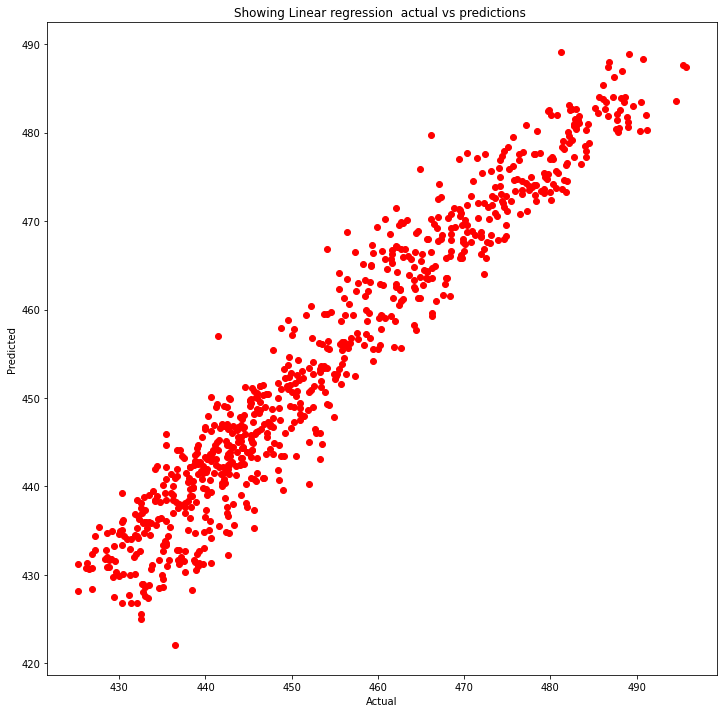

In [37]:
plt.figure(figsize=(12,12))
plt.scatter(y_test,lr_pred,color='red')
plt.title('Showing Linear regression  actual vs predictions ')
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [38]:
lr_rmse=np.sqrt(mean_squared_error(y_test,lr_pred))
lr_mae=mean_absolute_error(y_test,lr_pred)
lr_mape=mean_absolute_percentage_error(y_test,lr_pred)

In [39]:
#using Randomforest model

In [40]:
rf=RandomForestRegressor(120)
rf.fit(x_train,y_train)
rf_pred=rf.predict(x_test)
rf_acc=r2_score(y_test,rf_pred)
rf_acc

0.9668890436266543

In [41]:
rf.predict([[5.11,39.40,1012.16,92.14]])

array([486.0275])

Text(0, 0.5, 'Predicted')

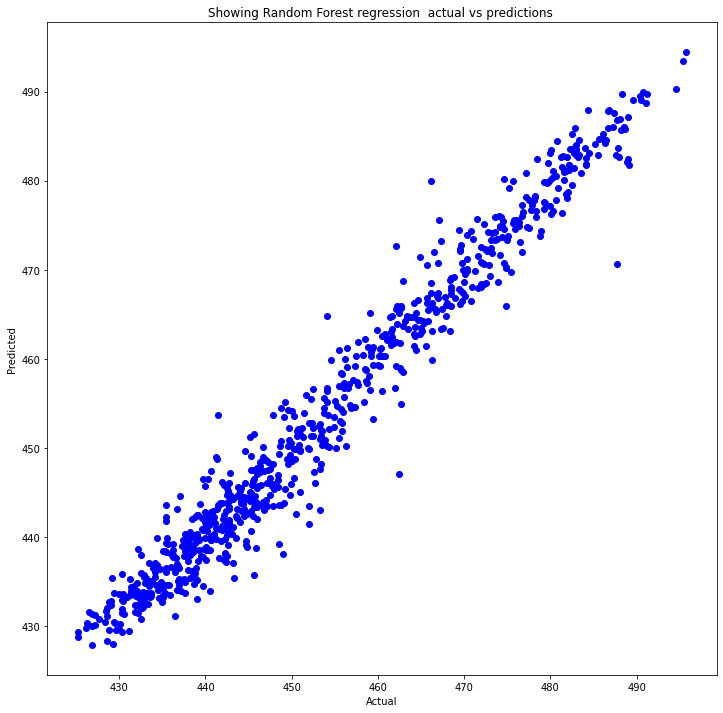

In [42]:
plt.figure(figsize=(12,12))
plt.scatter(y_test,rf_pred,color='blue')
plt.title('Showing Random Forest regression  actual vs predictions ')
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [43]:
rf_rmse=np.sqrt(mean_squared_error(rf_pred,y_test))
rf_rmse
rf_mae=mean_absolute_error(y_test,rf_pred)
rf_mape=mean_absolute_percentage_error(y_test,rf_pred)

In [44]:
#using Decision Tree Algorithm


In [45]:
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
dt_pred=dt.predict(x_test)
dt_acc=r2_score(y_test,dt_pred)
dt_acc

0.9318624053793635

Text(0, 0.5, 'Predicted')

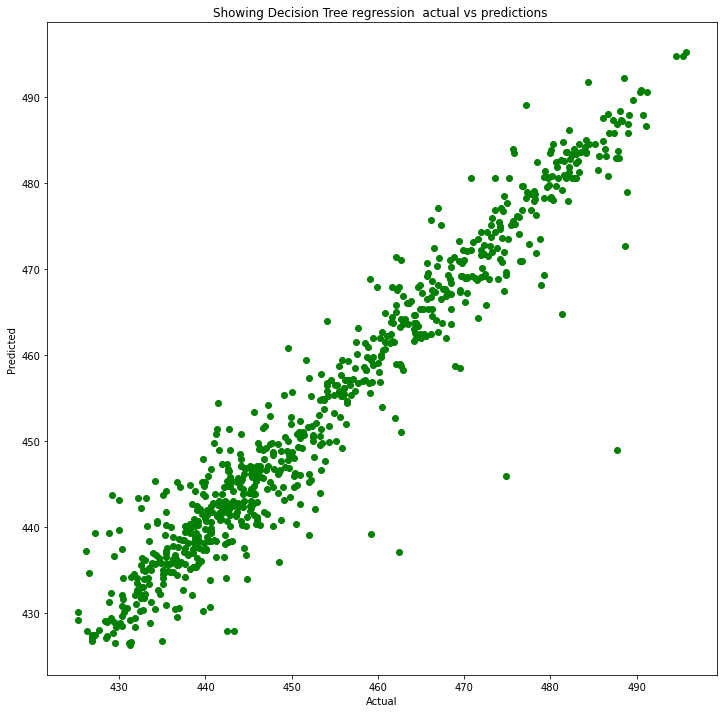

In [46]:
plt.figure(figsize=(12,12))
plt.scatter(y_test,dt_pred,color='green')
plt.title('Showing Decision Tree regression  actual vs predictions ')
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [47]:
dt_rmse=np.sqrt(mean_squared_error(dt_pred,y_test))
dt_mae=mean_absolute_error(y_test,dt_pred)
dt_mape=mean_absolute_percentage_error(y_test,lr_pred)

In [48]:
#using Lasso Algorithm


In [49]:
l=Lasso(alpha=0)
l.fit(x_train,y_train)
l_pred=l.predict(x_test)
l_acc=r2_score(y_test,l_pred)

Text(0, 0.5, 'Predicted')

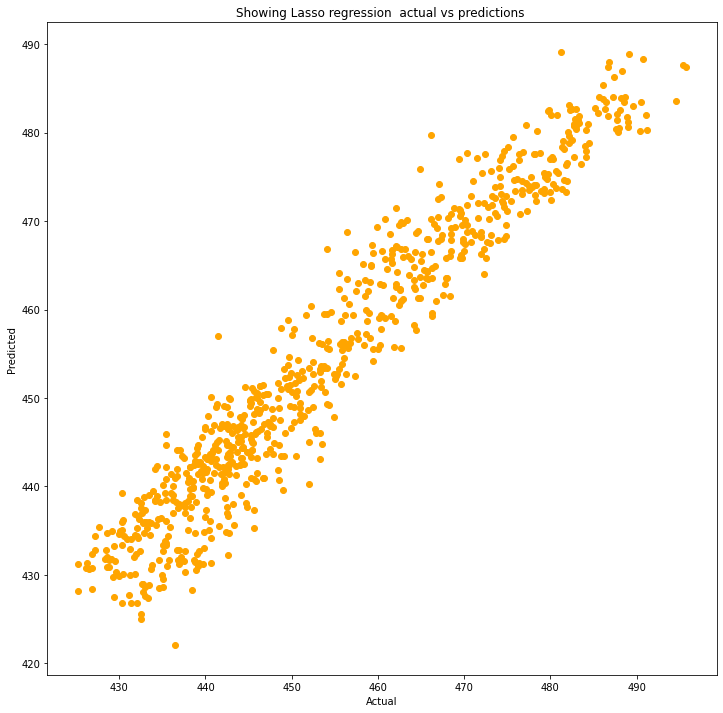

In [50]:
plt.figure(figsize=(12,12))
plt.scatter(y_test,l_pred,color='orange')
plt.title('Showing Lasso regression  actual vs predictions ')
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [51]:
l_rmse=np.sqrt(mean_squared_error(l_pred,y_test))
l_mae=mean_absolute_error(y_test,l_pred)
l_mape=mean_absolute_percentage_error(y_test,l_pred)

In [52]:
# using ArtificialNeural Network

In [53]:
mlp=MLPRegressor(hidden_layer_sizes=(10,10,10),max_iter=1000)
mlp.fit(x_train,y_train)
mlp_pred=mlp.predict(x_test)
mlp_acc=r2_score(y_test,mlp_pred)

Text(0, 0.5, 'Predicted')

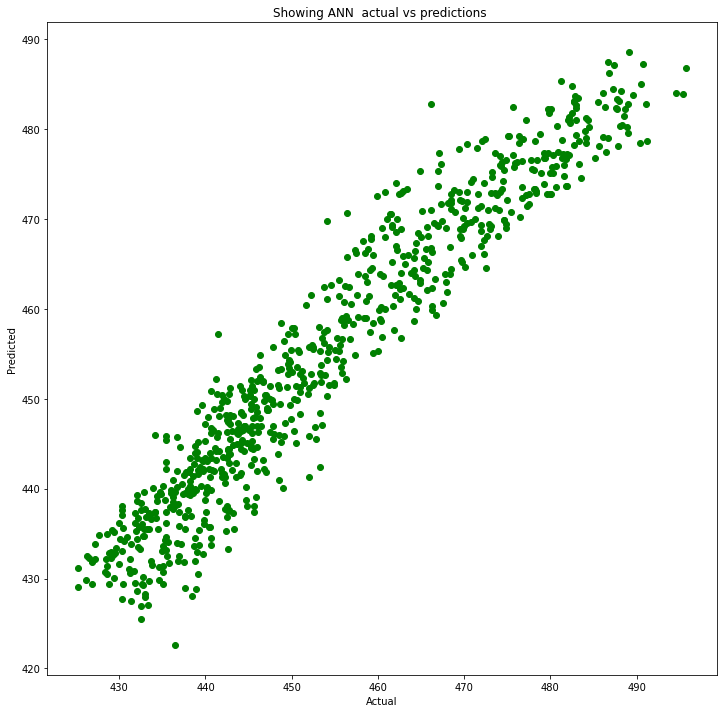

In [54]:
plt.figure(figsize=(12,12))
plt.scatter(y_test,mlp_pred,color='green')
plt.title('Showing ANN  actual vs predictions ')
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [55]:
mlp_rmse=np.sqrt(mean_squared_error(mlp_pred,y_test))
mlp_mae=mean_absolute_error(y_test,mlp_pred)
mlp_mape=mean_absolute_percentage_error(y_test,mlp_pred)

In [56]:
print('Linear regression r squared value:%.15f'%(lr_acc))
print('Random Forest regression r squared value:%.15f'%(rf_acc))
print('Decision Tree regression r squared value:%.15f'%(dt_acc))
print('Lasso regression r squared value:%.15f'%(l_acc))
print('ANN  r squared value:%.15f'%(mlp_acc))

Linear regression r squared value:0.933320867301264
Random Forest regression r squared value:0.966889043626654
Decision Tree regression r squared value:0.931862405379363
Lasso regression r squared value:0.933320867301264
ANN  r squared value:0.919920356018971


In [57]:
print('Linear regression RMSE:%.15f'%(lr_rmse))
print('Random Forest regression RMSE:%.15f'%(rf_rmse))
print('Decision Tree regression RMSE:%.15f'%(dt_rmse))
print('Lasso regression RMSE:%.15f'%(l_rmse))
print('ANN RMSE:%.15f'%(mlp_rmse))

Linear regression RMSE:4.432719719658166
Random Forest regression RMSE:3.123641349144035
Decision Tree regression RMSE:4.480935573393487
Lasso regression RMSE:4.432719719658170
ANN RMSE:4.857763501135021


In [58]:
print('Linear regression MAE:%.15f'%(lr_mae))
print('Random Forest regression MAE:%.15f'%(rf_mae))
print('Decision Tree regression MAE:%.15f'%(dt_mae))
print('Lasso regression MAE:%.15f'%(l_mae))
print('ANN MAE:%.15f'%(mlp_mae))

Linear regression MAE:3.609253972409202
Random Forest regression MAE:2.303003225806428
Decision Tree regression MAE:2.935961290322580
Lasso regression MAE:3.609253972409204
ANN MAE:3.960926871878899


In [59]:
print('Linear regression MAPE:%.15f'%(lr_mape))
print('Random Forest regression MAPE:%.15f'%(rf_mape))
print('Decision Tree regression MAPE:%.15f'%(dt_mape))
print('Lasso regression MAPE:%.15f'%(l_mape))
print('ANN MAPE:%.15f'%(mlp_mape))

Linear regression MAPE:0.007955209503387
Random Forest regression MAPE:0.005079915973260
Decision Tree regression MAPE:0.007955209503387
Lasso regression MAPE:0.007955209503387
ANN MAPE:0.008725317604719


# Applying Hyper parameter to the regression model

In [61]:
rf_p={
   
    'n_estimators':[150,160,200],
    'max_depth':[x for x in range(5,20,2)]
    
    
}

grid_rf=GridSearchCV(RandomForestRegressor(),rf_p,cv=10,n_jobs=-1,verbose=True)
grid_rf.fit(x_train,y_train)
pred_rf=grid_rf.predict(x_test)
r=r2_score(y_test,pred_rf)
print('Accuracy of Random forest:',r)

Fitting 10 folds for each of 24 candidates, totalling 240 fits
Accuracy of Random forest: 0.9670089518581745


In [62]:
grid_rf.best_estimator_

RandomForestRegressor(max_depth=19, n_estimators=160)

In [63]:
rf_rmse=np.sqrt(mean_squared_error(y_test,pred_rf))
print(rf_rmse)
rf_mae=mean_absolute_error(y_test,pred_rf)
print(rf_mae)
rf_mape=mean_absolute_percentage_error(y_test,pred_rf)
print(rf_mape)

3.11798023170328
2.3013216746543987
0.005077164790562266
